<a href="https://colab.research.google.com/github/silviolima07/residencia_tec_puc_ml/blob/main/confusion_matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![classification](https://drive.google.com/uc?export=view&id=1EpwBs9CTkkbt18xMjmcVkZXAMAOS1vcL)

### Práticas a serem desenvolvidas:
1 . Criação de um dataset sintético para avaliação da tarefa de classificação

2 . Divisão de dados em treinamento e teste

3 . Criação e aplicação de um modelo de Machine Learning

4 . Verificação da eficiência do modelo na tarefa de classificação através da Matriz de Confusão.


### Exercicio
### Utilize a biblioteca sklearn para criar um dataset genérico a partir da função make_classification .
### O seu problema deve conter um total de amostras distribuidas em um conjunto de features, onde você irá definir o número de features relevantes e informativas arbitrariamente, assim como valor do parâmetro random_state . O número de classes no problema deve ser 2.
### De posse do dataset criado, crie o código em Python para realizar as seguintes etapas:

a. Divida os dados de treinamento e teste na proporção e

b. Aplique o algoritmo SVM (Máquinas de Vetores Suporte - Suport Vector
Machines) para realizar a classificação.
Obs: O material da Aula Síncrona 01 apresenta um exemplo da aplicação deste
algoritmo.

c. Pesquise sobre a função classification_report contida na biblioteca
sklearn.metrics e utilize-a para obter as métricas de avaliação de desempenho
do modelo que você implementou.

### Import libs necessárias

In [138]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn import svm
from sklearn.metrics  import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

### Criar o dataset sintético

In [139]:
X, y = make_classification(
    n_samples=1000,  # row number
    n_features=10, # feature numbers
    n_informative=6, # The number of informative features
    n_redundant = 2, # The number of redundant features
    n_repeated = 2, # The number of duplicated features
    n_classes = 2, # The number of classes
    random_state = 42 # random seed
)

In [140]:
X_data = np.array(X)
y_data = np.array(y)
new_data = np.append(X_data ,y_data.reshape(-1,1),axis=1)

new_data

array([[ 0.64205136,  0.64205136, -0.28746145, ...,  2.92047979,
        -1.06285901,  0.        ],
       [-0.60714372, -0.60714372,  2.03094863, ...,  1.61845594,
        -0.81539753,  1.        ],
       [ 1.11833571,  1.11833571, -1.27209717, ...,  1.83375585,
        -1.16066311,  0.        ],
       ...,
       [-2.14965989, -2.14965989,  1.1740607 , ..., -0.11916747,
         5.33658602,  1.        ],
       [ 3.3082597 ,  3.3082597 , -1.67162236, ..., -0.07826706,
         4.65794024,  0.        ],
       [ 0.52907618,  0.52907618,  1.49436679, ..., -1.11985147,
         0.55160464,  1.        ]])

In [141]:
df = pd.DataFrame(new_data)
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.642051,0.642051,-0.287461,-0.991861,-1.231644,-0.287461,0.584713,2.390047,2.920480,-1.062859,0.0
1,-0.607144,-0.607144,2.030949,-1.133519,-0.101457,2.030949,0.521562,-0.913324,1.618456,-0.815398,1.0
2,1.118336,1.118336,-1.272097,-0.539677,1.110608,-1.272097,-0.611794,1.796204,1.833756,-1.160663,0.0
3,2.654719,2.654719,-0.275492,-0.087561,-3.086835,-0.275492,-0.366536,-1.346117,-0.562669,1.730237,0.0
4,0.196195,0.196195,-1.642119,2.232951,0.321953,-1.642119,-0.383674,1.058116,1.680176,1.252684,0.0


In [142]:
new_col = []
i = 0
for col in df.columns:
    if i ==  len(df.columns) - 1:
        new_col.append("target")
    else :
        new_col.append("f" + str(i))

    i += 1

df.columns = new_col

### Dataset gerado

In [143]:

df

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,target
0,0.642051,0.642051,-0.287461,-0.991861,-1.231644,-0.287461,0.584713,2.390047,2.920480,-1.062859,0.0
1,-0.607144,-0.607144,2.030949,-1.133519,-0.101457,2.030949,0.521562,-0.913324,1.618456,-0.815398,1.0
2,1.118336,1.118336,-1.272097,-0.539677,1.110608,-1.272097,-0.611794,1.796204,1.833756,-1.160663,0.0
3,2.654719,2.654719,-0.275492,-0.087561,-3.086835,-0.275492,-0.366536,-1.346117,-0.562669,1.730237,0.0
4,0.196195,0.196195,-1.642119,2.232951,0.321953,-1.642119,-0.383674,1.058116,1.680176,1.252684,0.0
...,...,...,...,...,...,...,...,...,...,...,...
995,1.772508,1.772508,-3.288411,2.379091,-2.870036,-3.288411,1.731336,-0.606140,-1.010200,0.598072,0.0
996,1.423222,1.423222,-0.726873,1.364671,-1.689582,-0.726873,-1.267845,0.661149,0.752222,2.892070,0.0
997,-2.149660,-2.149660,1.174061,2.637980,-3.146675,1.174061,-0.653372,2.052448,-0.119167,5.336586,1.0
998,3.308260,3.308260,-1.671622,1.696192,-3.065443,-1.671622,-2.392799,0.807168,-0.078267,4.657940,0.0


### Listando dados da Feature 1 (f1)

In [144]:
df.iloc[:,1]

0      0.642051
1     -0.607144
2      1.118336
3      2.654719
4      0.196195
         ...   
995    1.772508
996    1.423222
997   -2.149660
998    3.308260
999    0.529076
Name: f1, Length: 1000, dtype: float64

### Visualização da distribuiçao dos dados das colunas 1 e 2. A classe é identificada pela cor do ponto.

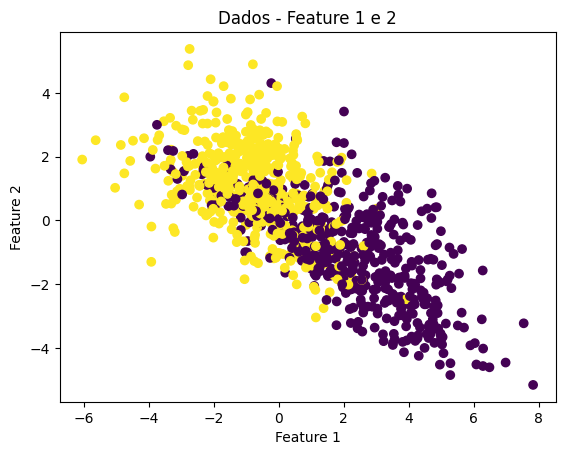

In [145]:
fig, ax = plt.subplots()
ax.scatter(df.iloc[:,1], df.iloc[:,2], c = df.target)
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_title('Dados - Feature 1 e 2')
plt.show()




In [146]:
X = df.drop(['target'], axis=1)
y = df['target']

### Divisão em treino e teste

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=42) # 70% training and 30% test

In [148]:
print("X_train:", X_train.shape)
print("X_test:", X_test.shape, "\n")
#
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (700, 10)
X_test: (300, 10) 

y_train: (700,)
y_test: (300,)


### Criar o modelo SVC Classifier, treinar o modelo e fazer um predição com dados de teste.

In [149]:
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

## Comparando a plotagem das features 1 e 2 no dataset original com 1000 linhas e a plotagem no dataset de teste com 300 linhas.
### As classes são identificadas pelas cores dos pontos.

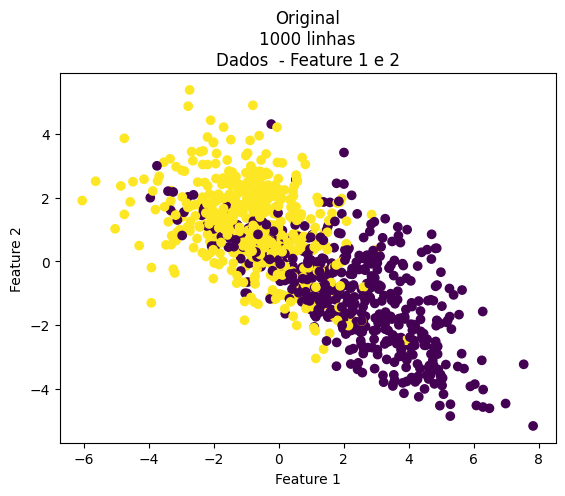

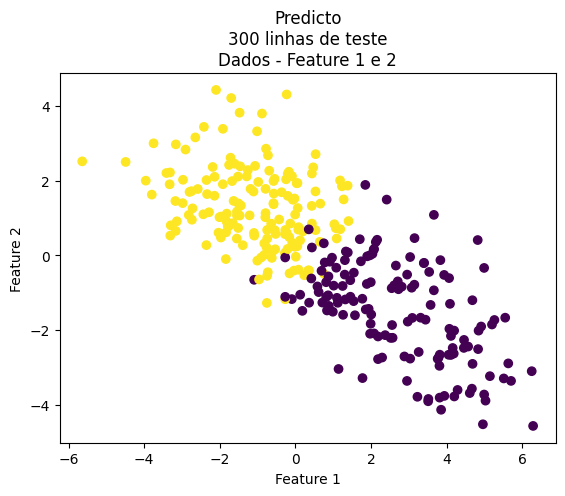

In [150]:
fig, ax = plt.subplots()
ax.scatter(X.iloc[:,1], X.iloc[:,2], c = y)
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_title('Original\n1000 linhas\nDados  - Feature 1 e 2')
plt.show()

fig, ax = plt.subplots()
ax.scatter(X_test.iloc[:,1], X_test.iloc[:,2], c = y_pred)
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_title('Predicto\n300 linhas de teste\nDados - Feature 1 e 2')
plt.show()

### Acurácia do modelo

In [151]:
acuracia = accuracy_score(y_test, y_pred)
acuracia = np.round(acuracia,2)
print("Acurácia:", acuracia)

Acurácia: 0.81


### Precision e Recall
#### - Precision é a taxa obtida pela divisão do numero de labels positivos verdadeiros pela soma do numero de labels positivos verdadeiros mais o numero de labels falso positivos.
- Equaçao: VP/VP+FP

#### - Recall é a taxa obtida pela divisão do numero de labels positivos verdadeiros pela soma do numero de labels positivos verdadeiros mais o numero de labels falso negativos.
- Equacao: VP/VP+FN

In [152]:
precision = precision_score(y_test, y_pred)
precision = np.round(precision,2)
print("Precision:", precision)
#
recall = recall_score(y_test, y_pred)
recall = np.round(recall,2)
print("Recall:",recall)

Precision: 0.8
Recall: 0.84



### Confusion matrix



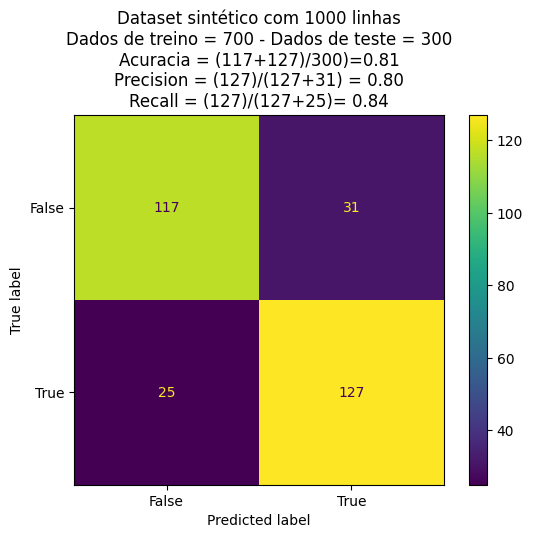

In [153]:
confusion_matrix = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.title("Dataset sintético com 1000 linhas\nDados de treino = 700 - Dados de teste = 300\nAcuracia = (117+127)/300)=0.81\nPrecision = (127)/(127+31) = 0.80\nRecall = (127)/(127+25)= 0.84")
plt.show()


### Classification report

### A base de teste tem 300 linhas e a classificação alcançou as seguintes métricas de avaluiação para a classe de interesse 1 com suporte de 152 linhas:
- precisão de 0.80
- recall de 0.84
- f1-score de 0.82

In [154]:
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

         0.0       0.82      0.79      0.81       148
         1.0       0.80      0.84      0.82       152

    accuracy                           0.81       300
   macro avg       0.81      0.81      0.81       300
weighted avg       0.81      0.81      0.81       300

